In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from missingpy import MissForest
import warnings

warnings.filterwarnings('ignore')

In [392]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

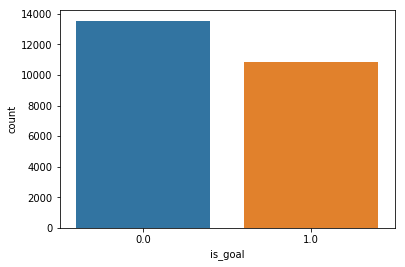

In [394]:
sns.countplot(x='is_goal', data=df)

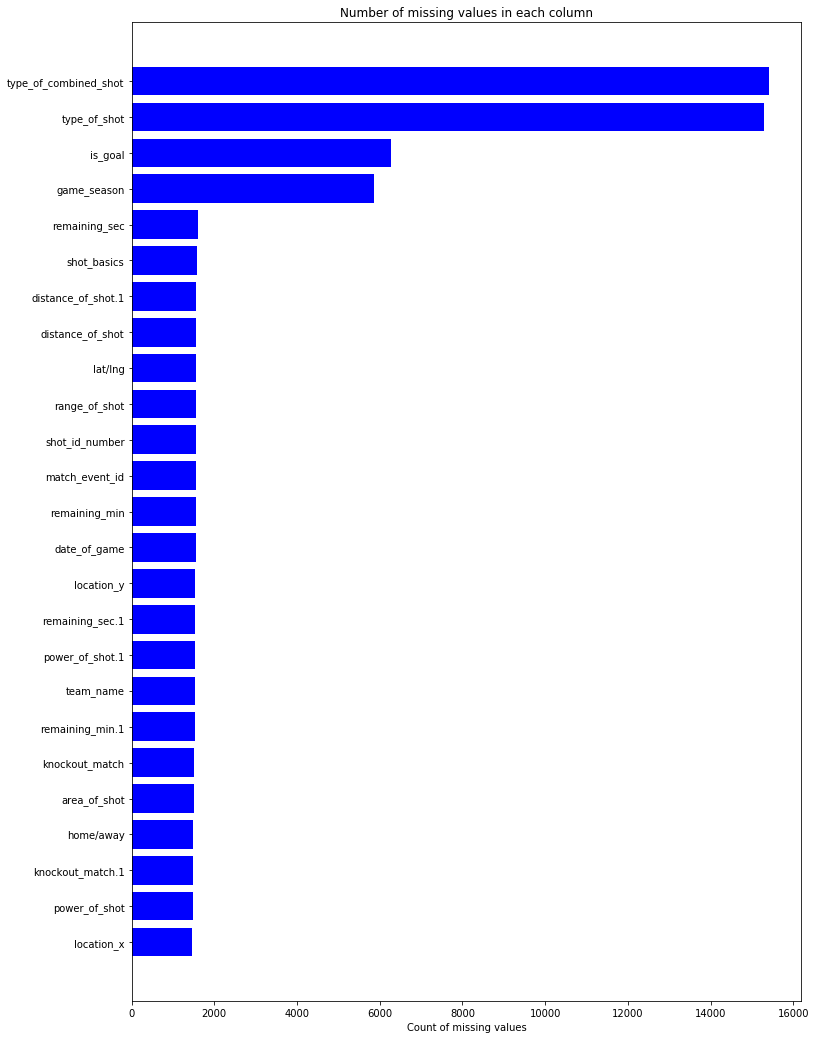

In [395]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [396]:
df = df.drop(['type_of_combined_shot', 'type_of_shot', 'game_season', 'Unnamed: 0', 
              'shot_id_number', 'team_id', 'team_name'], axis=1)

In [397]:
a = list(df['lat/lng'])
latitude = []
longitude = []
for i in a:
    try:
        x = i.split(', ')
        l1 = 1
        l2 = 1
        if x[0][0] == '-':
            l1 = -1
            x[0] = x[0][1:]
        if x[1][0] == '-':
            l2 = -1
            x[1] = x[1][1:]
        latitude.append(float(float(x[0]) * l1))
#         print(float(x[0]))
        longitude.append(float(float(x[1]) * l2))
#         print(float(x[1]))
    except:
        latitude.append(np.nan)
        longitude.append(np.nan)
        
df['latitude'] = pd.DataFrame(latitude)
df['longitude'] = pd.DataFrame(longitude)

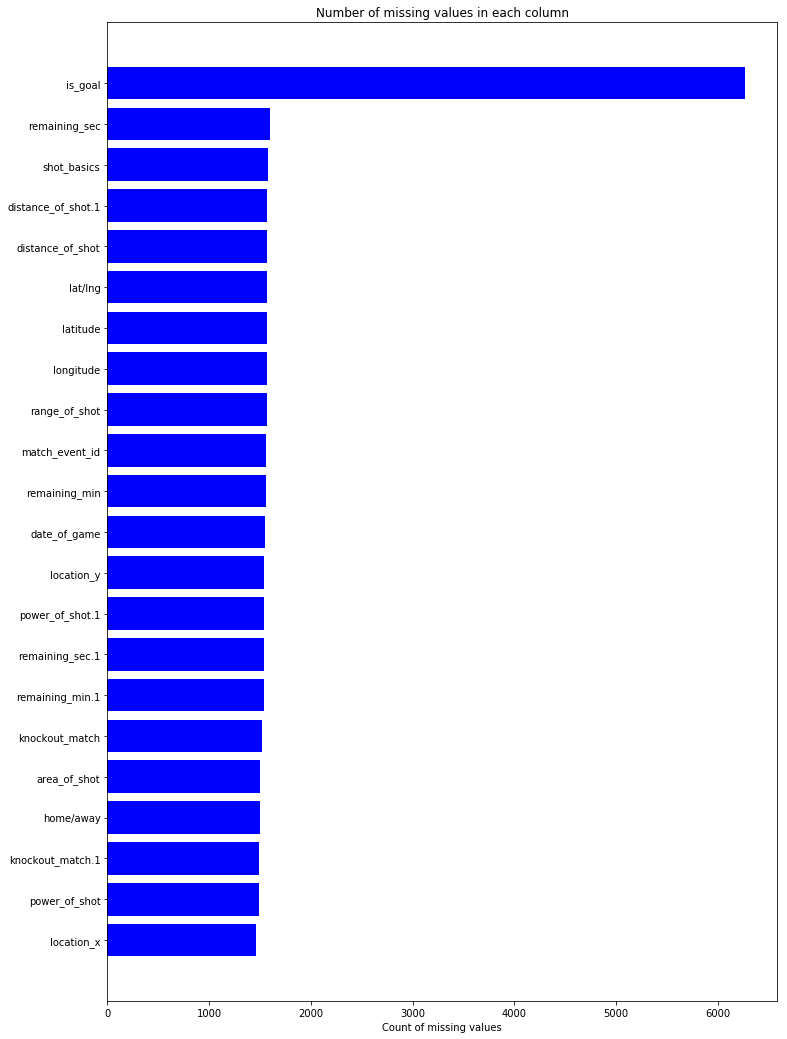

In [398]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [399]:
df = df.drop('lat/lng', axis=1)

In [400]:
a = ['area_of_shot', 'shot_basics', 'range_of_shot', 'date_of_game', 'home/away']
df1 = df[a]

# print(df1.info())

for i in df1.columns:
    print(i, ': ', len(df1[i].unique()))
    
# print(df1.head())

# print(list(df1['date_of_game'])[:5])

start, stop, step = -3, -1, 1
df1["home/away"] = df1["home/away"].str[-3:]

# home_away = list(df1['home/away'])
# new_home_away = []
# for i in home_away:
#     new_home_away.append()

df1['date_of_game']= pd.to_datetime(df1['date_of_game'])
print(df1.info())

# for i in df1.columns:
#     print(i, ': ', len(df1[i].unique()))

area_of_shot :  7
shot_basics :  8
range_of_shot :  6
date_of_game :  1559
home/away :  75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 5 columns):
area_of_shot     29195 non-null object
shot_basics      29122 non-null object
range_of_shot    29133 non-null object
date_of_game     29147 non-null datetime64[ns]
home/away        29200 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 1.2+ MB
None


In [401]:
df = df.drop(a, axis=1)
df = df.join(df1)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 22 columns):
match_event_id        29134 non-null float64
location_x            29236 non-null float64
location_y            29157 non-null float64
remaining_min         29135 non-null float64
power_of_shot         29211 non-null float64
knockout_match        29180 non-null float64
remaining_sec         29103 non-null float64
distance_of_shot      29130 non-null float64
is_goal               24429 non-null float64
match_id              30697 non-null int64
remaining_min.1       29162 non-null float64
power_of_shot.1       29158 non-null float64
knockout_match.1      29204 non-null float64
remaining_sec.1       29158 non-null float64
distance_of_shot.1    29129 non-null float64
latitude              29132 non-null float64
longitude             29132 non-null float64
area_of_shot          29195 non-null object
shot_basics           29122 non-null object
range_of_shot         29133 non-null obj

In [403]:
df.isnull().sum(axis = 0)

match_event_id        1563
location_x            1461
location_y            1540
remaining_min         1562
power_of_shot         1486
knockout_match        1517
remaining_sec         1594
distance_of_shot      1567
is_goal               6268
match_id                 0
remaining_min.1       1535
power_of_shot.1       1539
knockout_match.1      1493
remaining_sec.1       1539
distance_of_shot.1    1568
latitude              1565
longitude             1565
area_of_shot          1502
shot_basics           1575
range_of_shot         1564
date_of_game          1550
home/away             1497
dtype: int64

In [404]:
# for i in df1.columns:
#     fig, ax = plt.subplots(figsize=(12, 6))
#     sns.countplot(x=i, data=df1)
#     plt.show()

In [405]:
b = ['area_of_shot', 'shot_basics', 'range_of_shot', 'home/away']
for i in b:
    s = df[i].value_counts(normalize=True)
    missing = df1[i].isnull()
    df1.loc[missing, i] = np.random.choice(s.index, size=len(df[missing]), p=s.values)
    
df1.isnull().sum(axis = 0)

area_of_shot        0
shot_basics         0
range_of_shot       0
date_of_game     1550
home/away           0
dtype: int64

In [406]:
df = df.drop(b, axis=1)
df = df.join(df1[b])

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 22 columns):
match_event_id        29134 non-null float64
location_x            29236 non-null float64
location_y            29157 non-null float64
remaining_min         29135 non-null float64
power_of_shot         29211 non-null float64
knockout_match        29180 non-null float64
remaining_sec         29103 non-null float64
distance_of_shot      29130 non-null float64
is_goal               24429 non-null float64
match_id              30697 non-null int64
remaining_min.1       29162 non-null float64
power_of_shot.1       29158 non-null float64
knockout_match.1      29204 non-null float64
remaining_sec.1       29158 non-null float64
distance_of_shot.1    29129 non-null float64
latitude              29132 non-null float64
longitude             29132 non-null float64
date_of_game          29147 non-null datetime64[ns]
area_of_shot          30697 non-null object
shot_basics           30697 non-

In [408]:
df_new = pd.DataFrame()

for i in b:
    dfDummies = pd.get_dummies(df[i], prefix = i)
    if df_new.shape == (0, 0):
        df_new = dfDummies
    else:
        df_new = df_new.join(dfDummies)

print(df.shape)

df3 = df.copy()

print(df_new.shape)

df = df.drop(b, axis=1)
df = df.join(df_new)

print(df.shape)

(30697, 22)
(30697, 56)
(30697, 74)


In [409]:
df2 = df.copy()
df2['date_of_game'] = df2['date_of_game'].map(dt.datetime.toordinal)

In [410]:
df2['date_of_game'].head()

0    730424
1    730424
2    730424
3    730424
4    730424
Name: date_of_game, dtype: int64

In [412]:
d = ['remaining_min', 'power_of_shot', 'knockout_match', 'match_event_id', 'location_x', 'location_y', 
     'remaining_sec', 'distance_of_shot', 'remaining_min.1', 'power_of_shot.1', 'knockout_match.1', 
     'remaining_sec.1', 'distance_of_shot.1', 'latitude', 'longitude']
# for i in d:
#     s = df2[i].value_counts(normalize=True)
#     missing = df2[i].isnull()
#     df2.loc[missing, i] = np.random.choice(s.index, size=len(df[missing]), p=s.values)

imputer = MissForest()
df_numeric= imputer.fit_transform(df2[d])
df_numeric = pd.DataFrame(df_numeric, columns=d)
df2 = df2.drop(d, 1)
df2 = df2.join(df_numeric)
df2.isnull().sum(axis = 0)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


is_goal                               6268
match_id                                 0
date_of_game                             0
area_of_shot_Center(C)                   0
area_of_shot_Left Side Center(LC)        0
area_of_shot_Left Side(L)                0
area_of_shot_Mid Ground(MG)              0
area_of_shot_Right Side Center(RC)       0
area_of_shot_Right Side(R)               0
shot_basics_Goal Area                    0
shot_basics_Goal Line                    0
shot_basics_Left Corner                  0
shot_basics_Mid Ground Line              0
shot_basics_Mid Range                    0
shot_basics_Penalty Spot                 0
shot_basics_Right Corner                 0
range_of_shot_16-24 ft.                  0
range_of_shot_24+ ft.                    0
range_of_shot_8-16 ft.                   0
range_of_shot_Back Court Shot            0
range_of_shot_Less Than 8 ft.            0
home/away_ATL                            0
home/away_BKN                            0
home/away_B

In [413]:
def scatter_plot(_x, _y):
    sns.scatterplot(x=_x, y=_y)
    plt.show()

# for i in df2.columns:
#     if i != 'is_goal':
#         scatter_plot(df2.index, df2[i])

In [414]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
# sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
# plt.show()

# Correlation with output variable
cor_target = abs(cor['is_goal'])

# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.1]
print(relevant_features)
print(len(relevant_features))

df2 = df2[['is_goal', 'area_of_shot_Center(C)', 'shot_basics_Goal Area',
       'range_of_shot_24+ ft.', 'range_of_shot_Less Than 8 ft.', 'location_y',
       'distance_of_shot']]

is_goal                          1.000000
area_of_shot_Center(C)           0.133249
shot_basics_Goal Area            0.177062
shot_basics_Penalty Spot         0.101413
range_of_shot_24+ ft.            0.108729
range_of_shot_Less Than 8 ft.    0.162770
location_y                       0.144828
distance_of_shot                 0.197701
Name: is_goal, dtype: float64
8


<Figure size 864x720 with 0 Axes>

In [415]:
# p = ['match_event_id', 'location_x', 'location_y', 'remaining_sec', 'distance_of_shot', 
#      'remaining_min.1', 'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1', 
#      'latitude', 'longitude']

# for i in p:
#     df2[i].fillna((df2[i].median()), inplace=True)

# print(df2.isnull().sum(axis = 0))

In [416]:
train = df2.loc[~df2['is_goal'].isnull()]
test = df2.loc[df2['is_goal'].isnull()]

train, valid = train_test_split(train, test_size=0.2)

X_train = train.drop('is_goal', axis=1)
y_train = train['is_goal']

X_valid = valid.drop('is_goal', axis=1)
y_valid = valid['is_goal']

X_test = test.drop('is_goal', axis=1)

In [417]:
def conf_matrix_and_acc(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)   
    print ("Confusion Matrix : \n", cm)
    print ("Accuracy : ", accuracy_score(y_test, y_pred))

# Logistic Regression

In [418]:
def logistic_regression(x_train, y_train, x_test):
    classifier = LogisticRegression(random_state = 0) 
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test) 
    return y_pred

In [419]:
y_pred = logistic_regression(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[2253  461]
 [1441  731]]
Accuracy :  0.6107245190339746


# K - Nearest Neighbors

In [420]:
def knn(x_train, y_train, x_test):
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    return y_pred

In [421]:
y_pred = knn(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[1912  802]
 [1558  614]]
Accuracy :  0.5169873106835857


# Support Vector Classifiers and Variants

In [422]:
def svc(x_train, y_train, x_test):
    svm = SVC()
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    return y_pred

In [423]:
y_pred = svc(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[2053  661]
 [1317  855]]
Accuracy :  0.5951698731068359


In [424]:
def linear_svc(x_train, y_train, x_test):
    lsvc = LinearSVC()
    lsvc.fit(x_train, y_train)
    y_pred = lsvc.predict(x_test)
    return y_pred

In [425]:
y_pred = linear_svc(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[1154 1560]
 [1119 1053]]
Accuracy :  0.45169873106835856


# Naive Bayes' and Variants

In [426]:
def bernoulli_nb(x_train, y_train, x_test):
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    y_pred = bnb.predict(x_test)
    return y_pred

def gaussian_nb(x_train, y_train, x_test):
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    return y_pred

In [427]:
y_pred = bernoulli_nb(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[2049  665]
 [1309  863]]
Accuracy :  0.5959885386819485


In [428]:
y_pred = gaussian_nb(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[1992  722]
 [1260  912]]
Accuracy :  0.5943512075317233


# Decision Trees

In [429]:
def decision_tree(x_train, y_train, x_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    return y_pred

In [430]:
y_pred = decision_tree(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[1708 1006]
 [1115 1057]]
Accuracy :  0.5659025787965616


# Random Forest

In [431]:
def random_forest(x_train, y_train, x_test):
    classifier = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    classifier.fit(x_train, y_train) 
    y_pred = classifier.predict(x_test)
    return y_pred

In [432]:
y_pred = random_forest(X_train, y_train, X_valid)
conf_matrix_and_acc(y_valid, y_pred)

Confusion Matrix : 
 [[1591 1123]
 [1027 1145]]
Accuracy :  0.5599672533769955
